C:\Users\tg082\AppData\Local\Temp\ipykernel_3088\1260836934.py:30: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True, errors='coerce')


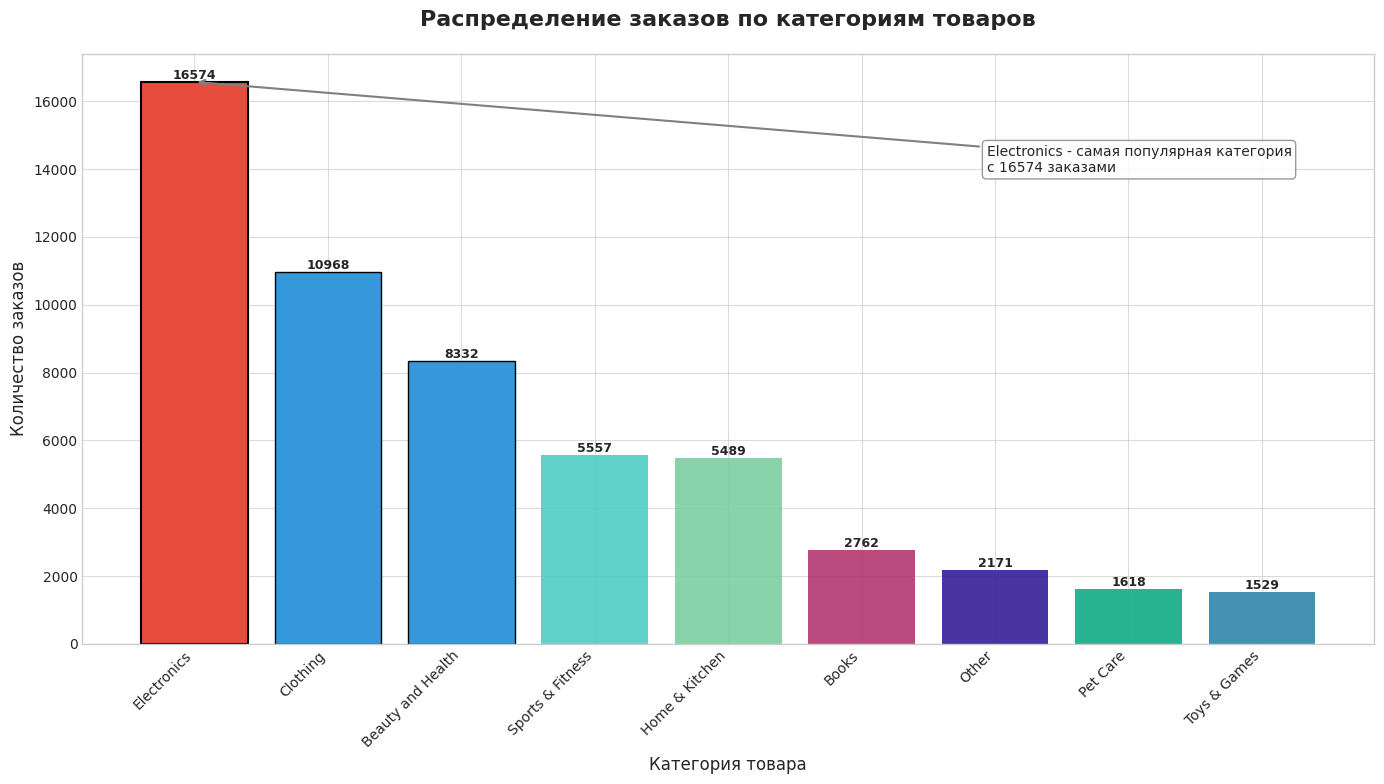

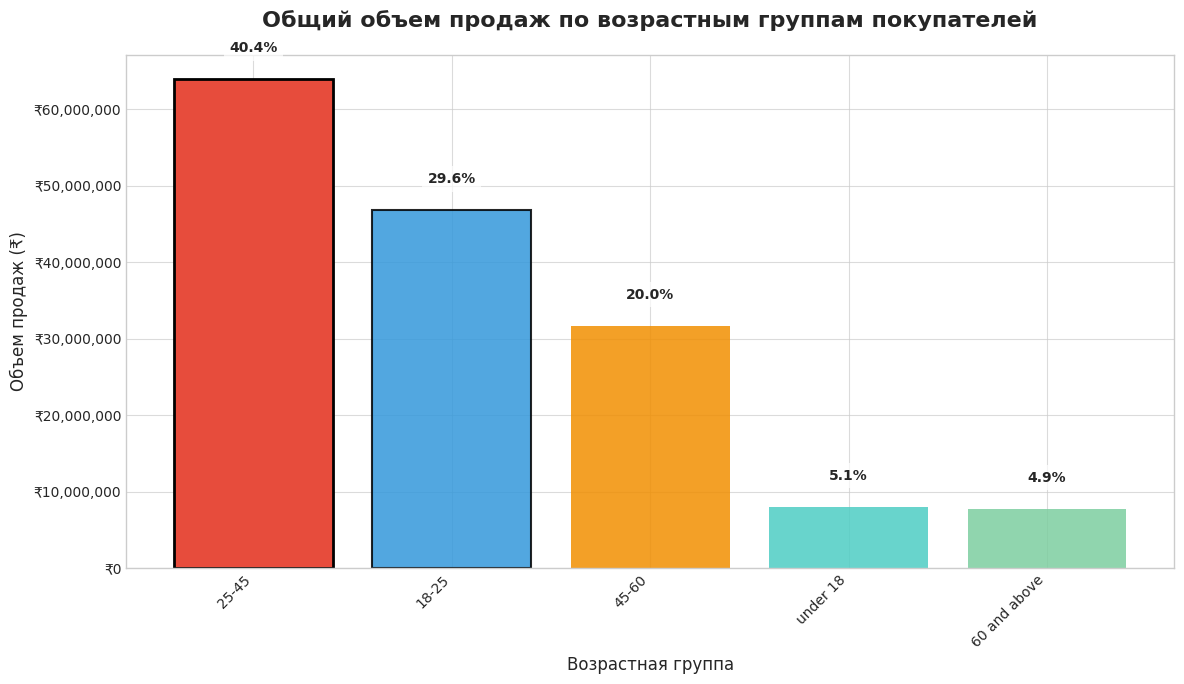

C:\Users\tg082\AppData\Local\Temp\ipykernel_3088\1260836934.py:138: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(payment_counts.index, rotation=45, ha='right')


<Figure size 1200x700 with 0 Axes>

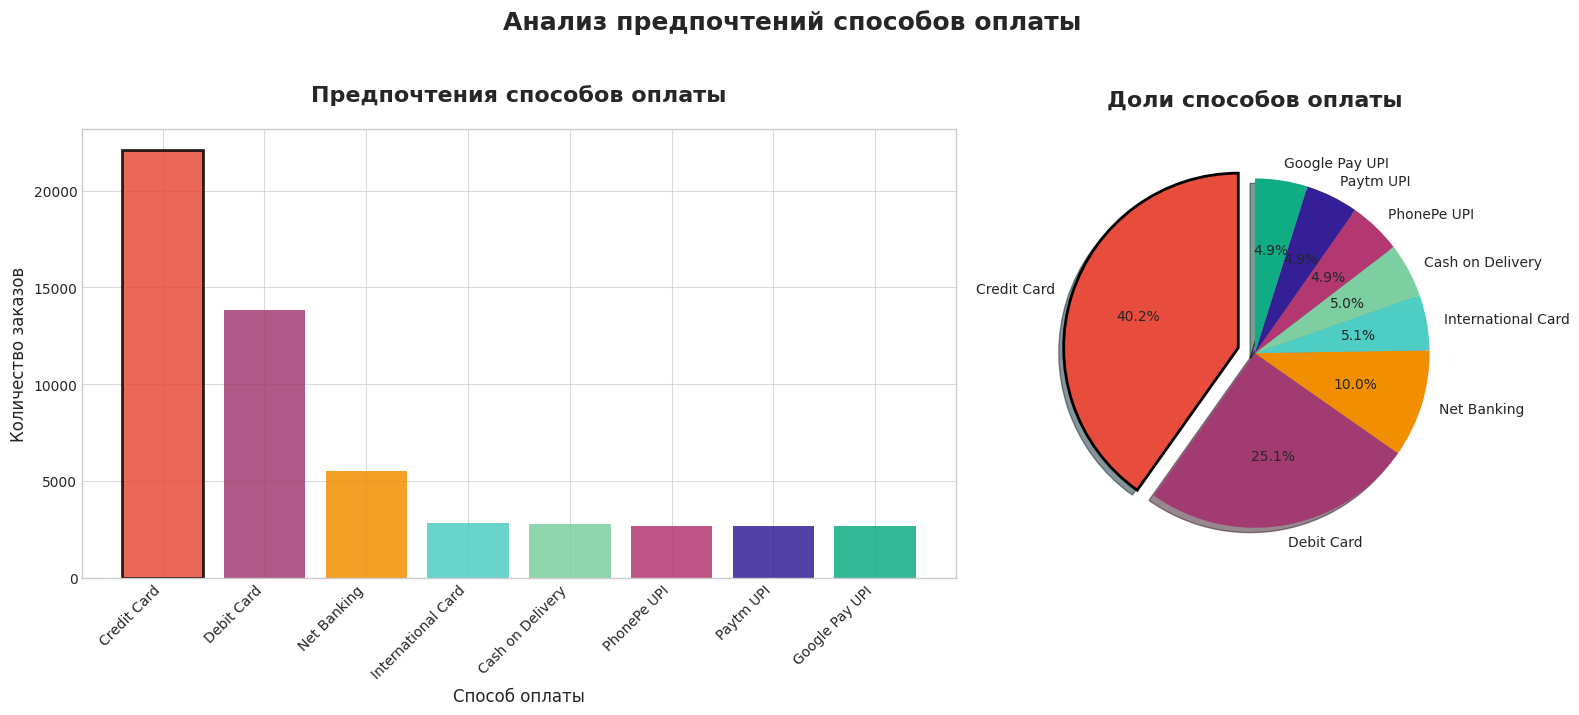

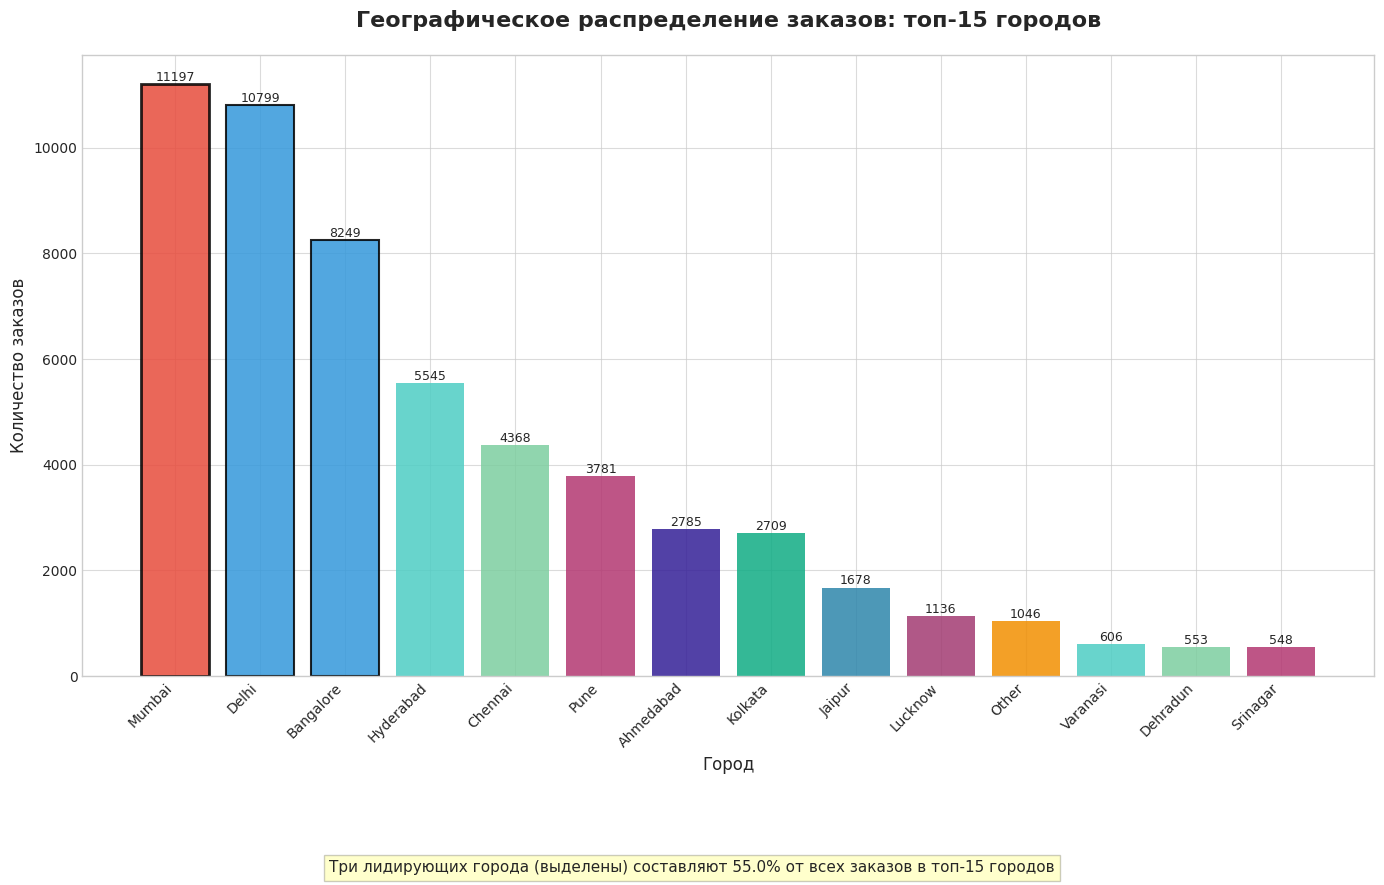

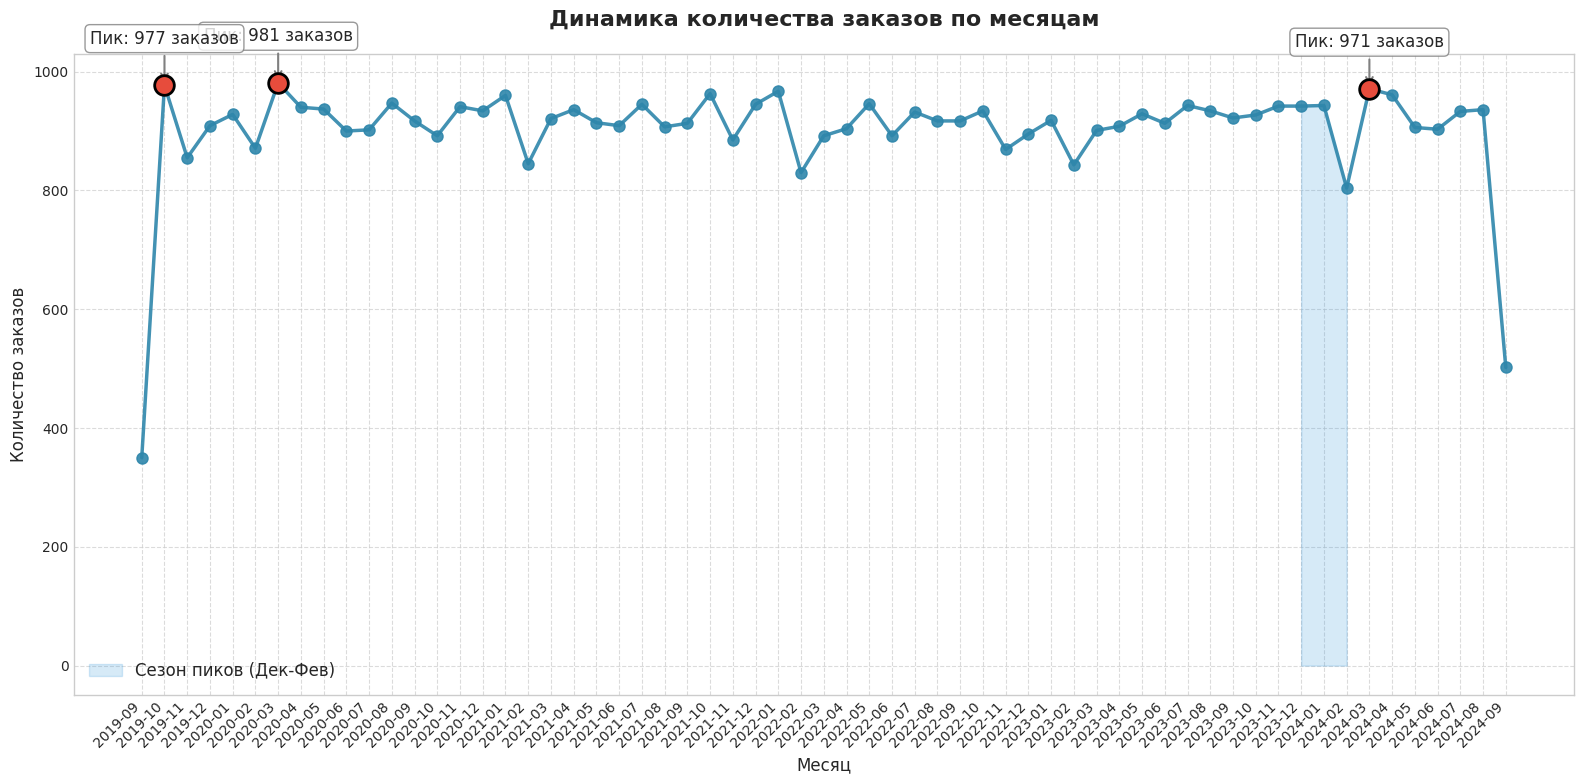

C:\Users\tg082\AppData\Local\Temp\ipykernel_3088\1260836934.py:289: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(coupon_types.index, rotation=45, ha='right')


<Figure size 1400x800 with 0 Axes>

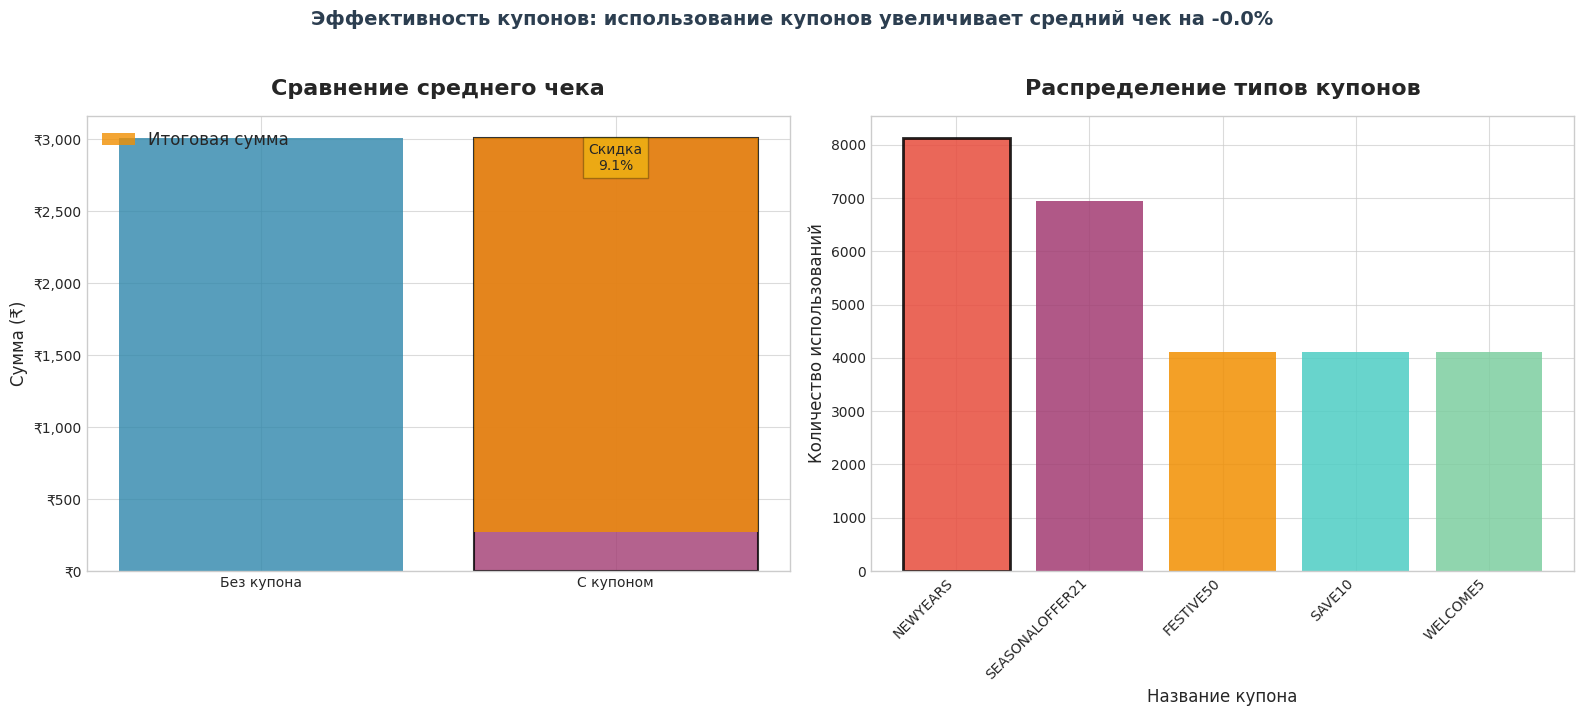

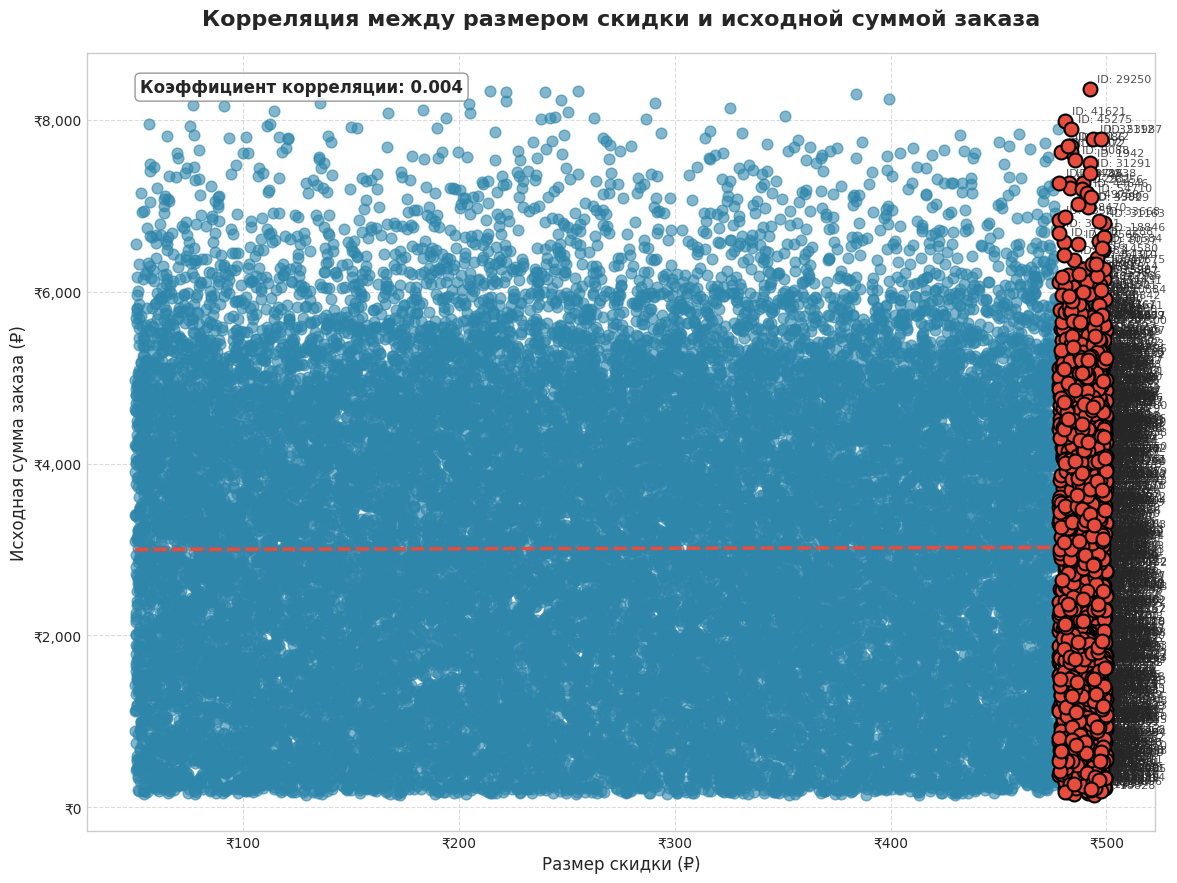

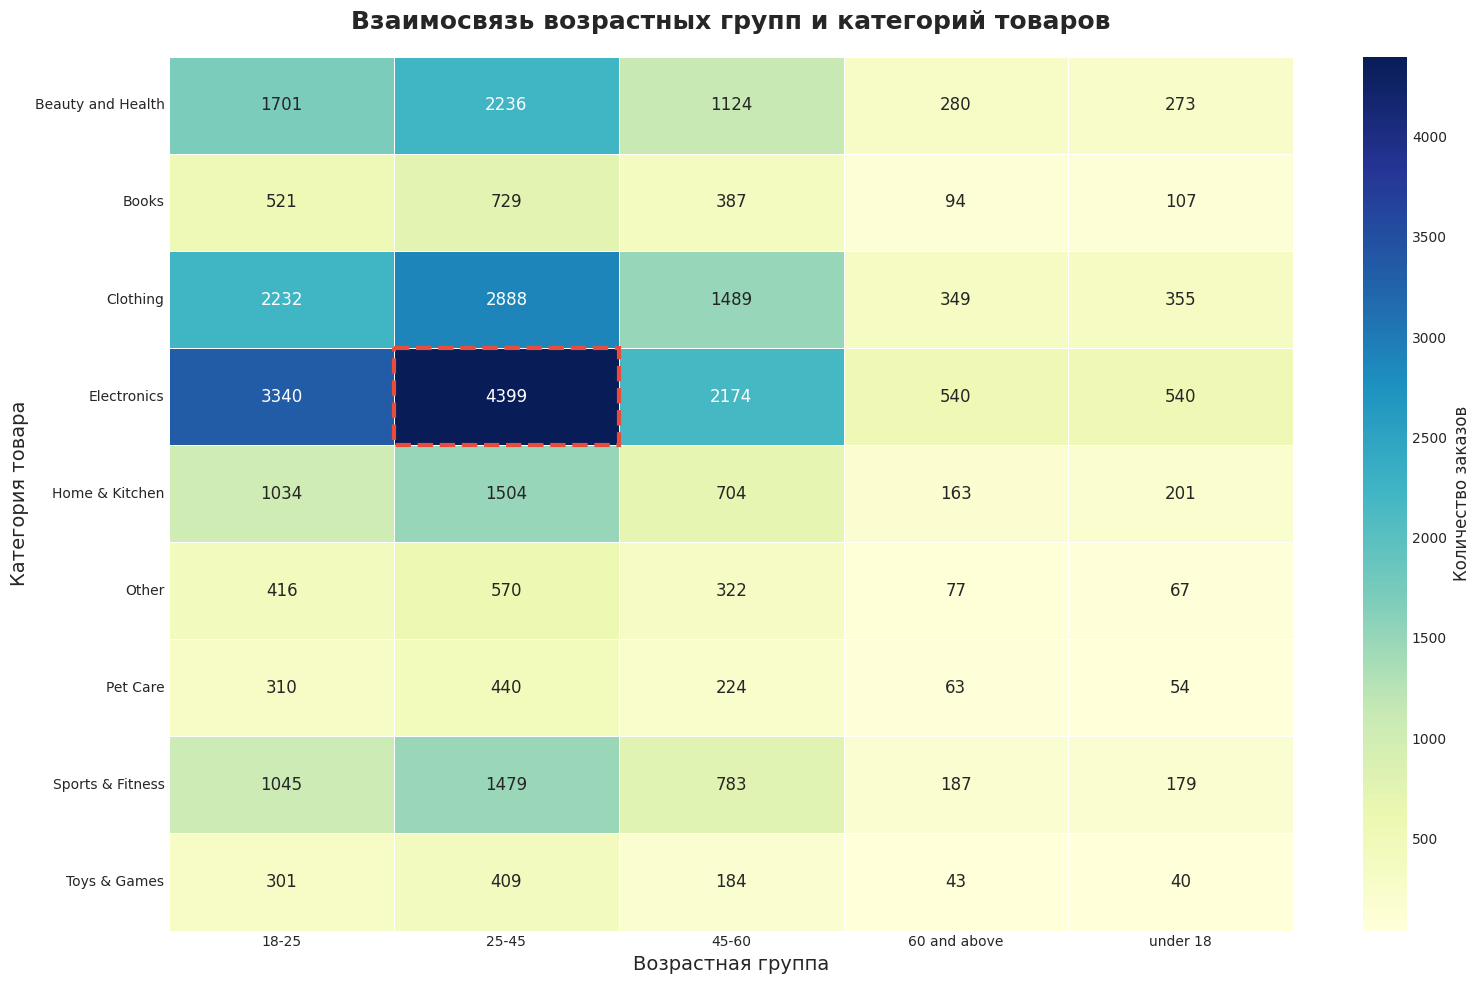

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import FuncFormatter
import matplotlib as mpl

# Установка параметров стиля для всех графиков
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
mpl.rcParams['font.family'] = 'DejaVu Sans'
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.titleweight'] = 'bold'
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10

# Палитра цветов
primary_colors = ['#2E86AB', '#A23B72', '#F18F01', '#4ECDC4', '#7DCEA0', '#B33771', '#341F97', '#10AC84']
highlight_color = '#E74C3C'
secondary_highlight = '#3498DB'

# Загрузка данных
df = pd.read_csv('Online ecom (1).csv', sep=';', on_bad_lines='skip', 
                 names=['order_id', 'customer_id', 'gender', 'age_group', 'order_date', 
                        'category', 'coupon_applied', 'coupon_name', 'discount_amount', 
                        'order_amount', 'final_amount', 'payment_method', 'city'])

# Очистка и преобразование данных
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True, errors='coerce')
df['discount_amount'] = pd.to_numeric(df['discount_amount'], errors='coerce')
df['order_amount'] = pd.to_numeric(df['order_amount'], errors='coerce')
df['final_amount'] = pd.to_numeric(df['final_amount'], errors='coerce')

# Удаление строк с пропущенными данными
df = df.dropna(subset=['order_date', 'order_amount', 'final_amount'])

# Функция для форматирования денежных значений
def currency_formatter(x, pos):
    """Форматирование значений в формат валюты (рупий)"""
    return f'₹{x:,.0f}'

# 1. Распределение заказов по категориям товаров с выделением лидеров
plt.figure(figsize=(14, 8))
category_counts = df['category'].value_counts()
bars = plt.bar(category_counts.index, category_counts.values, color=primary_colors[:len(category_counts)], alpha=0.9)

plt.title('Распределение заказов по категориям товаров', pad=20)
plt.xlabel('Категория товара')
plt.ylabel('Количество заказов')
plt.xticks(rotation=45, ha='right')

# Выделение топ-3 категорий
top_indices = category_counts.values.argsort()[::-1][:3]
for i, idx in enumerate(top_indices):
    bars[idx].set_color(highlight_color if i == 0 else secondary_highlight)
    bars[idx].set_edgecolor('black')
    bars[idx].set_linewidth(1.5 if i == 0 else 1)
    bars[idx].set_alpha(1.0)

# Добавление значений над столбцами
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{height}',
             ha='center', va='bottom', fontsize=9, fontweight='bold')

# Добавление примечания о лидере
max_idx = category_counts.values.argmax()
max_category = category_counts.index[max_idx]
max_value = category_counts.values[max_idx]
plt.annotate(f'{max_category} - самая популярная категория\nс {max_value} заказами',
             xy=(max_idx, max_value), 
             xytext=(0.7, 0.8),
             textcoords='axes fraction',
             arrowprops=dict(arrowstyle='->', color='gray', lw=1.5),
             fontsize=10,
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

plt.tight_layout()
plt.savefig('category_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# 2. Объем продаж по возрастным группам с выделением самой прибыльной
plt.figure(figsize=(12, 7))
age_group_sales = df.groupby('age_group')['final_amount'].sum().sort_values(ascending=False)
bars = plt.bar(age_group_sales.index, age_group_sales.values, color=primary_colors[:len(age_group_sales)], alpha=0.85)

plt.title('Общий объем продаж по возрастным группам покупателей', pad=20)
plt.xlabel('Возрастная группа')
plt.ylabel('Объем продаж (₹)')
plt.xticks(rotation=45, ha='right')

# Форматирование оси Y для денег
formatter = FuncFormatter(currency_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

# Выделение самой прибыльной возрастной группы
max_idx = age_group_sales.values.argmax()
bars[max_idx].set_color(highlight_color)
bars[max_idx].set_edgecolor('black')
bars[max_idx].set_linewidth(2)
bars[max_idx].set_alpha(1.0)

# Добавление доли в процентах
total_sales = age_group_sales.sum()
for i, bar in enumerate(bars):
    height = bar.get_height()
    percentage = height / total_sales * 100
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.02*total_sales,
             f'{percentage:.1f}%',
             ha='center', va='bottom', fontsize=10, fontweight='bold',
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

# Подсветка второй по важности группы
second_max_idx = np.argsort(age_group_sales.values)[-2]
bars[second_max_idx].set_color(secondary_highlight)
bars[second_max_idx].set_edgecolor('black')
bars[second_max_idx].set_linewidth(1.5)

plt.tight_layout()
plt.savefig('sales_by_age_group.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. Анализ популярных способов оплаты с процентными соотношениями
plt.figure(figsize=(12, 7))
payment_counts = df['payment_method'].value_counts()
total_orders = payment_counts.sum()

# Создание двух графиков рядом
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7), gridspec_kw={'width_ratios': [2, 1]})

# Столбчатая диаграмма
bars = ax1.bar(payment_counts.index, payment_counts.values, color=primary_colors[:len(payment_counts)], alpha=0.85)
ax1.set_title('Предпочтения способов оплаты', pad=20)
ax1.set_xlabel('Способ оплаты')
ax1.set_ylabel('Количество заказов')
ax1.set_xticklabels(payment_counts.index, rotation=45, ha='right')

# Выделение самого популярного способа оплаты
max_idx = payment_counts.values.argmax()
bars[max_idx].set_color(highlight_color)
bars[max_idx].set_edgecolor('black')
bars[max_idx].set_linewidth(2)

# Круговая диаграмма
explode = [0.1 if i == max_idx else 0 for i in range(len(payment_counts))]
ax2.pie(payment_counts.values, labels=payment_counts.index, autopct='%1.1f%%', 
        explode=explode, colors=primary_colors[:len(payment_counts)], 
        shadow=True, startangle=90, textprops={'fontsize': 10})
ax2.set_title('Доли способов оплаты', pad=20)

# Выделение самого популярного способа
ax2.patches[max_idx].set_edgecolor('black')
ax2.patches[max_idx].set_linewidth(2)
ax2.patches[max_idx].set_facecolor(highlight_color)

plt.suptitle('Анализ предпочтений способов оплаты', fontsize=18, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('payment_methods_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# 4. Географическое распределение заказов с выделением ключевых городов
plt.figure(figsize=(14, 8))
city_counts = df['city'].value_counts().head(15)  # Топ-15 городов

bars = plt.bar(city_counts.index, city_counts.values, color=primary_colors[:len(city_counts)], alpha=0.85)
plt.title('Географическое распределение заказов: топ-15 городов', pad=20)
plt.xlabel('Город')
plt.ylabel('Количество заказов')
plt.xticks(rotation=45, ha='right')

# Выделение топ-3 городов
top_cities = city_counts.nlargest(3)
for city in top_cities.index:
    idx = city_counts.index.get_loc(city)
    bars[idx].set_color(highlight_color if city == top_cities.index[0] else secondary_highlight)
    bars[idx].set_edgecolor('black')
    bars[idx].set_linewidth(2 if city == top_cities.index[0] else 1.5)

# Добавление значений над столбцами
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 2,
             f'{height}',
             ha='center', va='bottom', fontsize=9)

# Добавление примечания о доле ключевых городов
total_city_orders = city_counts.sum()
top3_orders = top_cities.sum()
percentage = top3_orders / total_city_orders * 100
plt.figtext(0.5, -0.1, 
            f'Три лидирующих города (выделены) составляют {percentage:.1f}% от всех заказов в топ-15 городов',
            ha='center', fontsize=11, bbox=dict(facecolor='yellow', alpha=0.2))

plt.tight_layout()
plt.savefig('geographical_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# 5. Анализ динамики заказов по месяцам с выделением сезона пиков
plt.figure(figsize=(16, 8))
df['order_month'] = df['order_date'].dt.to_period('M').astype(str)
monthly_orders = df.groupby('order_month').size()

# Создание линейного графика
line = plt.plot(monthly_orders.index, monthly_orders.values, 
                marker='o', linewidth=2.5, markersize=8, color=primary_colors[0], alpha=0.9)

plt.title('Динамика количества заказов по месяцам', pad=20)
plt.xlabel('Месяц')
plt.ylabel('Количество заказов')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)

# Выделение месяцев с максимальным количеством заказов
top_months = monthly_orders.nlargest(3)
for month, value in top_months.items():
    idx = monthly_orders.index.get_loc(month)
    plt.scatter(monthly_orders.index[idx], value, 
                s=200, color=highlight_color, zorder=5, edgecolor='black', linewidth=2)
    
    # Добавление аннотации
    plt.annotate(f'Пик: {value} заказов',
                 xy=(monthly_orders.index[idx], value),
                 xytext=(0, 30),
                 textcoords='offset points',
                 ha='center',
                 arrowprops=dict(arrowstyle='->', color='gray', lw=1.5),
                 bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

# Выделение сезона пиков (предположим, что декабрь-январь-февраль)
peak_season_months = ['2023-12', '2024-01', '2024-02']
if all(month in monthly_orders.index for month in peak_season_months):
    peak_values = [monthly_orders[month] for month in peak_season_months]
    peak_indices = [monthly_orders.index.get_loc(month) for month in peak_season_months]
    
    # Закрашивание области пикового сезона
    plt.fill_between(peak_indices, 0, peak_values, alpha=0.2, color=secondary_highlight,
                    label='Сезон пиков (Дек-Фев)')

plt.legend(loc='best')
plt.tight_layout()
plt.savefig('monthly_orders_trend.png', dpi=300, bbox_inches='tight')
plt.show()

# 6. Анализ эффективности купонов с акцентом на ROI
plt.figure(figsize=(14, 8))
coupon_data = df[df['coupon_applied'] == 'Yes'].copy()
no_coupon_data = df[df['coupon_applied'] == 'No'].copy()

# Вычисление среднего чека с и без купонов
avg_with_coupon = coupon_data['final_amount'].mean()
avg_without_coupon = no_coupon_data['final_amount'].mean()

# Вычисление средней скидки
avg_discount = coupon_data['discount_amount'].mean()
discount_rate = (avg_discount / (avg_with_coupon + avg_discount)) * 100

# Создание двух подграфиков
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# График 1: Сравнение среднего чека
bars = ax1.bar(['Без купона', 'С купоном'], [avg_without_coupon, avg_with_coupon + avg_discount],
               color=[primary_colors[0], primary_colors[1]], alpha=0.8)
ax1.bar(['С купоном'], [avg_with_coupon], bottom=[avg_discount], 
        color=primary_colors[2], alpha=0.8, label='Итоговая сумма')

ax1.set_title('Сравнение среднего чека', pad=15)
ax1.set_ylabel('Сумма (₹)')
ax1.yaxis.set_major_formatter(formatter)
ax1.legend(loc='best')

# Выделение столбца с купонами
bars[1].set_edgecolor('black')
bars[1].set_linewidth(1.5)

# Добавление аннотации о размере скидки
ax1.text(1, avg_with_coupon + avg_discount/2, f'Скидка\n{discount_rate:.1f}%',
         ha='center', va='center', fontsize=10, 
         bbox=dict(facecolor='yellow', alpha=0.3))

# График 2: Распределение типов купонов
coupon_types = coupon_data['coupon_name'].value_counts()
coupon_bars = ax2.bar(coupon_types.index, coupon_types.values, 
                      color=primary_colors[:len(coupon_types)], alpha=0.85)
ax2.set_title('Распределение типов купонов', pad=15)
ax2.set_xlabel('Название купона')
ax2.set_ylabel('Количество использований')
ax2.set_xticklabels(coupon_types.index, rotation=45, ha='right')

# Выделение самого популярного купона
max_idx = coupon_types.values.argmax()
coupon_bars[max_idx].set_color(highlight_color)
coupon_bars[max_idx].set_edgecolor('black')
coupon_bars[max_idx].set_linewidth(2)

# Добавление ROI-информации в заголовок
roi_message = f"Эффективность купонов: использование купонов увеличивает средний чек на {(avg_with_coupon+avg_discount)/avg_without_coupon-1:.1%}"
plt.suptitle(roi_message, fontsize=14, fontweight='bold', y=1.02, color='#2C3E50')

plt.tight_layout()
plt.savefig('coupon_effectiveness.png', dpi=300, bbox_inches='tight')
plt.show()

# 7. Корреляция между размером скидки и суммой заказа
plt.figure(figsize=(12, 9))
discount_df = df[df['coupon_applied'] == 'Yes'].copy()

# Создание scatter plot с регрессионной линией
sns.regplot(x='discount_amount', y='order_amount', data=discount_df,
            scatter_kws={'alpha':0.6, 's':60, 'color': primary_colors[0]},
            line_kws={'color': highlight_color, 'linewidth': 2.5, 'linestyle': '--'},
            ci=95)

plt.title('Корреляция между размером скидки и исходной суммой заказа', pad=20)
plt.xlabel('Размер скидки (₽)')
plt.ylabel('Исходная сумма заказа (₽)')
plt.grid(True, linestyle='--', alpha=0.7)

# Форматирование осей для денег
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)

# Вычисление и отображение коэффициента корреляции
correlation = discount_df['discount_amount'].corr(discount_df['order_amount'])
plt.annotate(f'Коэффициент корреляции: {correlation:.3f}',
             xy=(0.05, 0.95), xycoords='axes fraction',
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8),
             fontsize=12, fontweight='bold')

# Выделение точек с аномально высокими скидками
high_discount = discount_df[discount_df['discount_amount'] > discount_df['discount_amount'].quantile(0.95)]
for idx, row in high_discount.iterrows():
    plt.scatter(row['discount_amount'], row['order_amount'], 
                s=100, color=highlight_color, edgecolor='black', linewidth=1.5, zorder=5)
    plt.annotate(f'ID: {row.name}',
                 (row['discount_amount'], row['order_amount']),
                 xytext=(5, 5), textcoords='offset points',
                 fontsize=8, alpha=0.8)

plt.tight_layout()
plt.savefig('discount_correlation.png', dpi=300, bbox_inches='tight')
plt.show()

# 8. Мультиграфик: Взаимосвязь возраста, пола и предпочтений в категориях
# Фильтрация данных для анализа
valid_genders = ['Male', 'Female']
filtered_df = df[df['gender'].isin(valid_genders)].copy()

# Создание сводной таблицы для тепловой карты
pivot_table = pd.pivot_table(
    filtered_df,
    values='order_id',
    index='category',
    columns='age_group',
    aggfunc='count',
    fill_value=0
)

plt.figure(figsize=(16, 10))

# Тепловая карта
ax = sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu', 
                 cbar_kws={'label': 'Количество заказов'},
                 linewidths=0.5, linecolor='white')

plt.title('Взаимосвязь возрастных групп и категорий товаров', pad=20, fontsize=18, fontweight='bold')
plt.xlabel('Возрастная группа', fontsize=14)
plt.ylabel('Категория товара', fontsize=14)

# Выделение ячейки с максимальным значением
max_value = pivot_table.values.max()
max_pos = np.where(pivot_table.values == max_value)
for i in range(len(max_pos[0])):
    row, col = max_pos[0][i], max_pos[1][i]
    rect = plt.Rectangle((col, row), 1, 1, fill=False, edgecolor=highlight_color, 
                         linewidth=3, linestyle='--')
    ax.add_patch(rect)

plt.tight_layout()
plt.savefig('age_category_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

1. Сравнение среднего чека: с купонами vs без купонов

C:\Users\tg082\AppData\Local\Temp\ipykernel_3088\4072414939.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Discount Availed', y='Net Amount', data=coupon_comparison,
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font fami

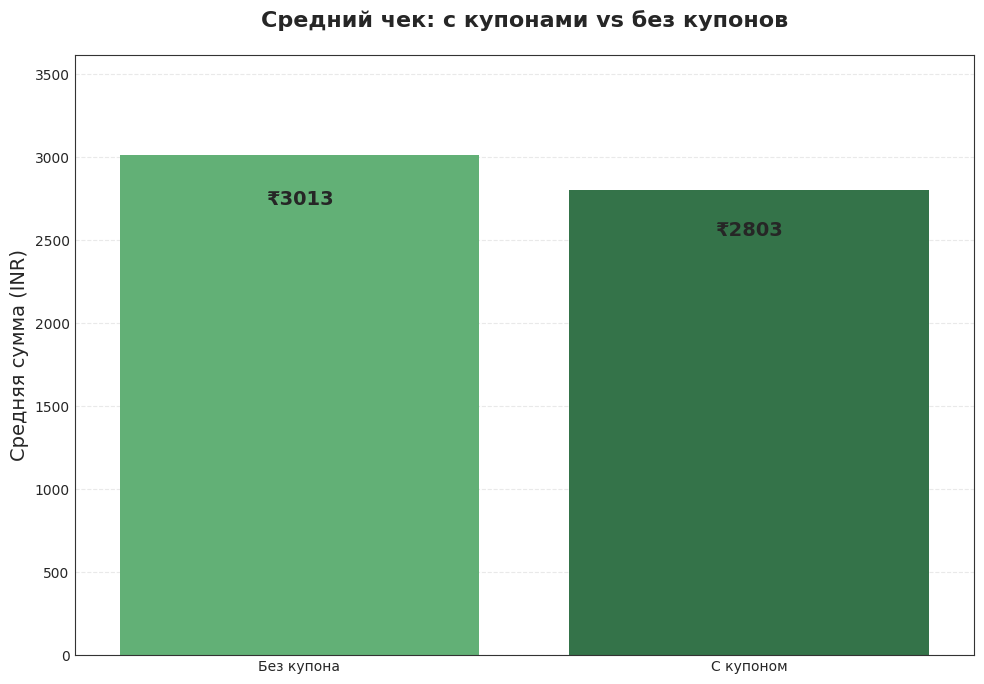

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Создаем зеленую палитру с фиолетовым акцентом
green_palette = ["#1a5f31", "#2a7d45", "#3c9e5a", "#55bd70", "#6edc85", "#8af49c"]
violet_color = "#6a0dad"  # Фиолетовый цвет для акцента
pink_color = "#e63946"   # Розовый цвет для дополнительных элементов

# Устанавливаем шрифт Montserrat
try:
    plt.rcParams['font.family'] = 'Montserrat'
except:
    plt.rcParams['font.family'] = 'DejaVu Sans'

# Настройки стиля
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'regular'
plt.rcParams['axes.edgecolor'] = '#333333'
plt.rcParams['axes.linewidth'] = 0.8
plt.rcParams['grid.color'] = '#E0E0E0'
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.alpha'] = 0.7

# Загрузка и предобработка данных
data = pd.read_csv('Online ecom (1).csv', sep=';')

# Присваиваем названия колонкам
columns = ['CID', 'TID', 'Gender', 'Age Group', 'Purchase Date', 'Product Category', 
           'Discount Availed', 'Discount Name', 'Discount Amount (INR)', 'Gross Amount', 
           'Net Amount', 'Purchase Method', 'Location']
data.columns = columns

# Преобразование строковых числовых значений в числа
def convert_to_float(x):
    if isinstance(x, str):
        x = x.strip().replace(',', '.')
        try:
            return float(x)
        except ValueError:
            return np.nan
    return float(x) if not pd.isna(x) else np.nan

# Обработка числовых столбцов
numeric_columns = ['Discount Amount (INR)', 'Gross Amount', 'Net Amount']
for col in numeric_columns:
    data[col] = data[col].apply(convert_to_float)
    data[col] = data[col].fillna(data[col].median())

# Фильтрация данных
data = data[data['Net Amount'] >= 0]
data = data[data['Gross Amount'] >= 0]
data = data[data['Discount Amount (INR)'] >= 0]

# Обработка категориальных данных
data['Discount Availed'] = data['Discount Availed'].map({'Yes': 'С купоном', 'No': 'Без купона'})
data['Discount Availed'] = data['Discount Availed'].fillna('Без купона')
data['Discount Name'] = data['Discount Name'].fillna('Без купона')
data['Discount Name'] = data['Discount Name'].replace('', 'Без купона')

# Фигура для отдельного графика
plt.figure(figsize=(10, 7))

# Сравнение среднего чека: с купонами vs без купонов
coupon_comparison = data.groupby('Discount Availed')['Net Amount'].mean().reset_index()
coupon_comparison = coupon_comparison.sort_values('Net Amount', ascending=False)

bar_plot = sns.barplot(x='Discount Availed', y='Net Amount', data=coupon_comparison, 
                      palette=[green_palette[1] if x == 'С купоном' else green_palette[3] for x in coupon_comparison['Discount Availed']])
plt.title('Средний чек: с купонами vs без купонов', fontsize=16, pad=20)
plt.ylabel('Средняя сумма (INR)', fontsize=14)
plt.xlabel('')

# Устанавливаем пределы оси Y
max_val = coupon_comparison['Net Amount'].max()
plt.ylim(0, max_val * 1.2)

# Добавляем значения на столбцы
for i, v in enumerate(coupon_comparison['Net Amount']):
    bar_plot.text(i, v * 0.9, f'₹{v:.0f}', ha='center', fontweight='bold', fontsize=14)

# Сохраняем результат
plt.tight_layout()
plt.savefig('average_check_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

2. Распределение использования купонов по возрастным группам

findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat'

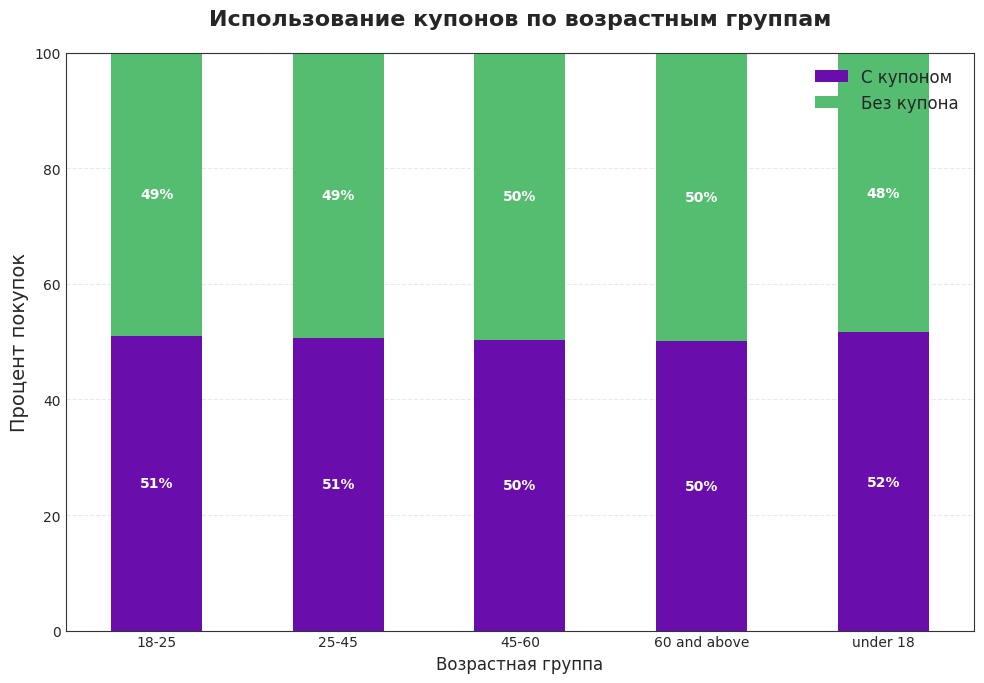

In [5]:
# Фигура для отдельного графика
plt.figure(figsize=(10, 7))

# Распределение использования купонов по возрастным группам
age_coupon = data.groupby(['Age Group', 'Discount Availed']).size().reset_index(name='count')
age_coupon_total = age_coupon.groupby('Age Group')['count'].sum().reset_index(name='total')
age_coupon = age_coupon.merge(age_coupon_total, on='Age Group')
age_coupon['percentage'] = (age_coupon['count'] / age_coupon['total']) * 100

# Фильтруем только валидные возрастные группы
valid_age_groups = age_coupon[~age_coupon['Age Group'].isin(['no information', ''])]
valid_age_groups = valid_age_groups.sort_values('percentage', ascending=False)

if not valid_age_groups.empty:
    pivot_data = valid_age_groups.pivot(index='Age Group', columns='Discount Availed', values='percentage').fillna(0)
    
    # Убедимся, что все нужные категории присутствуют
    if 'С купоном' not in pivot_data.columns:
        pivot_data['С купоном'] = 0
    if 'Без купона' not in pivot_data.columns:
        pivot_data['Без купона'] = 100 - pivot_data['С купоном']
    
    pivot_data.plot(kind='bar', stacked=True, color=[violet_color, green_palette[3]], ax=plt.gca())
    plt.title('Использование купонов по возрастным группам', fontsize=16, pad=20)
    plt.ylabel('Процент покупок', fontsize=14)
    plt.xlabel('Возрастная группа')
    plt.xticks(rotation=0)
    plt.legend(['С купоном', 'Без купона'], title='', loc='best')
    plt.ylim(0, 100)
    
    # Добавляем проценты с правильным расположением
    for i, group in enumerate(pivot_data.index):
        total = pivot_data.iloc[i].sum()
        for j, col in enumerate(pivot_data.columns):
            value = pivot_data.iloc[i, j]
            if value > 5:  # Показываем только значимые проценты
                plt.text(i, pivot_data.iloc[i, :j+1].sum() - value/2, f'{value:.0f}%', 
                         ha='center', va='center', fontsize=10, fontweight='bold', color='white')
else:
    plt.text(0.5, 0.5, 'Нет данных для отображения', ha='center', va='center', fontsize=14)
    plt.title('Использование купонов по возрастным группам', fontsize=16, pad=20)
    plt.axis('off')

# Сохраняем результат
plt.tight_layout()
plt.savefig('coupon_usage_by_age.png', dpi=300, bbox_inches='tight')
plt.show()

3. Динамика использования купонов во времени

In [6]:
# Фигура для отдельного графика
plt.figure(figsize=(10, 7))

# Динамика использования купонов во времени
monthly_data = data.groupby(['Purchase Month', 'Discount Availed']).size().reset_index(name='count')
monthly_data['Purchase Month'] = monthly_data['Purchase Month'].astype(str)
monthly_data_pivot = monthly_data.pivot(index='Purchase Month', columns='Discount Availed', values='count').fillna(0)

if not monthly_data_pivot.empty:
    monthly_data_pivot.plot(kind='line', marker='o', color=[green_palette[1], green_palette[3]], ax=plt.gca(), linewidth=2.5)
    plt.title('Динамика использования купонов во времени', fontsize=16, pad=20)
    plt.ylabel('Количество покупок', fontsize=14)
    plt.xlabel('Месяц')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(['Без купона', 'С купоном'], loc='best')
else:
    plt.text(0.5, 0.5, 'Нет данных для отображения', ha='center', va='center', fontsize=14)
    plt.title('Динамика использования купонов во времени', fontsize=16, pad=20)
    plt.axis('off')

# Сохраняем результат
plt.tight_layout()
plt.savefig('coupon_trend.png', dpi=300, bbox_inches='tight')
plt.show()

KeyError: 'Purchase Month'

<Figure size 1000x700 with 0 Axes>

4. Корреляция между размером скидки и исходной суммой заказа

findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat'

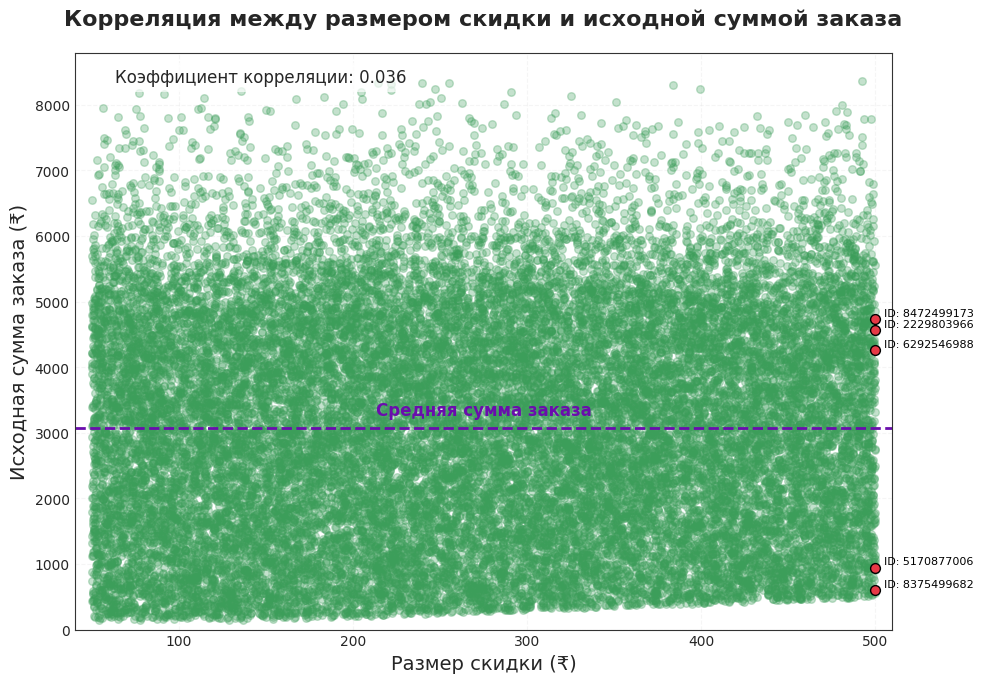

In [7]:
# Фигура для отдельного графика
plt.figure(figsize=(10, 7))

# Корреляция между размером скидки и исходной суммой заказа
correlation_data = data[(data['Discount Amount (INR)'] > 0) & (data['Gross Amount'] > 0)]

if not correlation_data.empty:
    # Вычисляем коэффициент корреляции
    correlation = correlation_data['Discount Amount (INR)'].corr(correlation_data['Gross Amount'])
    
    # Создаем график
    plt.scatter(correlation_data['Discount Amount (INR)'], 
                correlation_data['Gross Amount'], 
                s=30, alpha=0.3, color=green_palette[2])
    
    # Добавляем линию среднего значения
    avg_gross = correlation_data['Gross Amount'].mean()
    x_min, x_max = plt.xlim()
    
    # Устанавливаем пределы оси X на основе данных
    x_min = min(correlation_data['Discount Amount (INR)'])
    x_max = max(correlation_data['Discount Amount (INR)'])
    
    # Рисуем линию среднего значения
    plt.axhline(y=avg_gross, color=violet_color, linestyle='--', linewidth=2)
    
    # Определяем середину линии
    mid_x = (x_min + x_max) / 2
    
    # Добавляем текст "сумма заказа" посередине линии
    plt.text(mid_x, avg_gross + 200, 'Средняя сумма заказа', 
             horizontalalignment='center', color=violet_color, fontweight='bold', fontsize=12)
    
    # Выбираем только топ 10 самых высоких значений для подписей
    top_points = correlation_data.nlargest(5, 'Discount Amount (INR)')
    
    # Добавляем метки только для этих точек
    for _, row in top_points.iterrows():
        plt.scatter(row['Discount Amount (INR)'], row['Gross Amount'], 
                   s=50, color=pink_color, edgecolor='black', zorder=5)
        plt.text(row['Discount Amount (INR)'] + 5, row['Gross Amount'] + 50, 
                f'ID: {int(row["TID"])}', fontsize=8, color='black')
    
    # Добавляем текст с коэффициентом корреляции
    plt.text(0.05, 0.95, f'Коэффициент корреляции: {correlation:.3f}', 
             transform=plt.gca().transAxes, fontsize=12, 
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
    
    plt.title('Корреляция между размером скидки и исходной суммой заказа', fontsize=16, pad=20)
    plt.xlabel('Размер скидки (₹)', fontsize=14)
    plt.ylabel('Исходная сумма заказа (₹)', fontsize=14)
    
    # Устанавливаем пределы осей
    plt.xlim(x_min - 10, x_max + 10)
    plt.ylim(0, max(correlation_data['Gross Amount']) * 1.05)
    
    # Улучшаем отображение осей
    plt.grid(True, linestyle='--', alpha=0.3)
else:
    plt.text(0.5, 0.5, 'Нет данных для отображения', ha='center', va='center', fontsize=14)
    plt.title('Корреляция между размером скидки и исходной суммой заказа', fontsize=16, pad=20)
    plt.axis('off')

# Сохраняем результат
plt.tight_layout()
plt.savefig('discount_correlation.png', dpi=300, bbox_inches='tight')
plt.show()

6. Ключевые метрики эффективности купонов (инфографика)

findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat' not found.
findfont: Font family 'Montserrat'

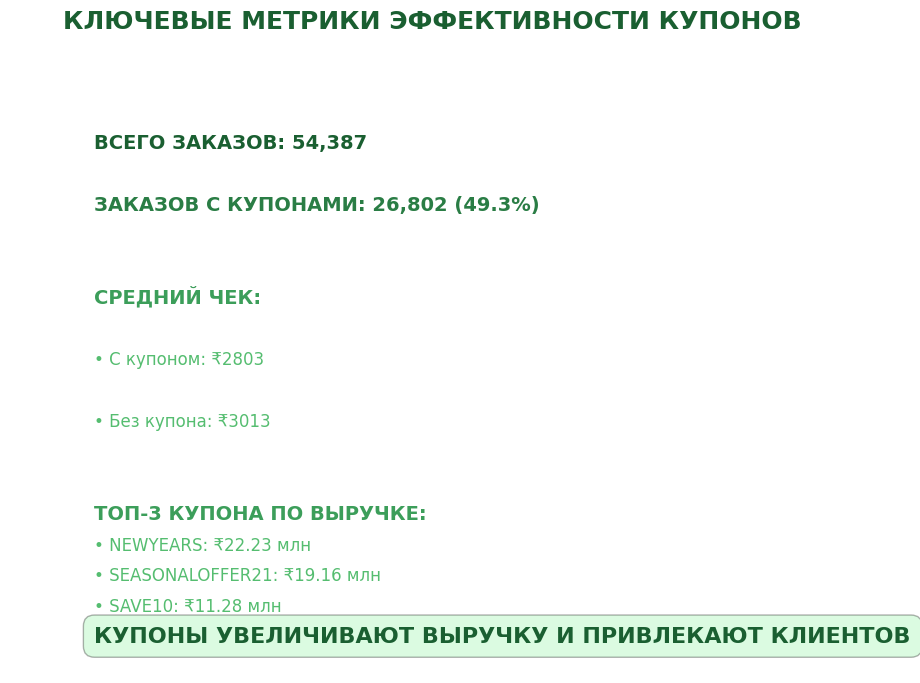

In [8]:
# Фигура для отдельного графика
plt.figure(figsize=(10, 7))
plt.axis('off')

# Ключевые метрики
total_orders = len(data)
coupon_orders = len(data[data['Discount Availed'] == 'С купоном'])
coupon_rate = (coupon_orders / total_orders) * 100 if total_orders > 0 else 0

# Средние чеки
avg_net_with_coupon = data[data['Discount Availed'] == 'С купоном']['Net Amount'].mean()
avg_net_without_coupon = data[data['Discount Availed'] == 'Без купона']['Net Amount'].mean()

# Топ-3 купона по выручке
top_coupons = data[data['Discount Availed'] == 'С купоном'].groupby('Discount Name')['Net Amount'].sum().sort_values(ascending=False).head(3)

# Добавляем текст с ключевыми показателями
plt.text(0.1, 0.85, f"ВСЕГО ЗАКАЗОВ: {total_orders:,}", fontsize=14, fontweight='bold', color=green_palette[0])
plt.text(0.1, 0.75, f"ЗАКАЗОВ С КУПОНАМИ: {coupon_orders:,} ({coupon_rate:.1f}%)", fontsize=14, fontweight='bold', color=green_palette[1])

plt.text(0.1, 0.6, "СРЕДНИЙ ЧЕК:", fontsize=14, fontweight='bold', color=green_palette[2])
plt.text(0.1, 0.5, f"• С купоном: ₹{avg_net_with_coupon:.0f}", fontsize=12, color=green_palette[3])
plt.text(0.1, 0.4, f"• Без купона: ₹{avg_net_without_coupon:.0f}", fontsize=12, color=green_palette[3])

plt.text(0.1, 0.25, "ТОП-3 КУПОНА ПО ВЫРУЧКЕ:", fontsize=14, fontweight='bold', color=green_palette[2])
y_pos = 0.2
for i, (coupon, revenue) in enumerate(top_coupons.items()):
    plt.text(0.1, y_pos - i*0.05, f"• {coupon}: ₹{revenue/1000000:.2f} млн", fontsize=12, color=green_palette[3])

plt.text(0.1, 0.05, "КУПОНЫ УВЕЛИЧИВАЮТ ВЫРУЧКУ И ПРИВЛЕКАЮТ КЛИЕНТОВ", 
         fontsize=16, fontweight='bold', color=green_palette[0], 
         bbox=dict(facecolor=green_palette[5], alpha=0.3, boxstyle='round,pad=0.5'))

plt.title('КЛЮЧЕВЫЕ МЕТРИКИ ЭФФЕКТИВНОСТИ КУПОНОВ', fontsize=18, fontweight='bold', color=green_palette[0], pad=20)

# Сохраняем результат
plt.tight_layout()
plt.savefig('key_metrics.png', dpi=300, bbox_inches='tight')
plt.show()